In [133]:
import json

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

# Star Wars Character Network

Data comes from [here](https://github.com/evelinag/star-wars-network-data)

In [156]:
with urlopen('https://raw.githubusercontent.com/evelinag/star-wars-network-data/master/starwars-full-interactions.json') as url:
    data = json.load(url)

In [157]:
nodes = pd.DataFrame(data['nodes'])
nodes

,name,value,colour
0,QUI-GON,61,#4f4fb1
1,NUTE GUNRAY,24,#808080
2,PK-4,3,#808080
3,TC-14,4,#808080
4,OBI-WAN,147,#48D1CC
...,...,...,...
105,YOLO ZIFF,3,#808080
106,COLONEL DATOO,3,#808080
107,ELLO ASTY,4,#808080
108,JESS,4,#808080


In [158]:
edges = pd.DataFrame(data['links'])
edges[['source','target']]

,source,target
0,1,0
1,2,3
2,4,3
3,0,3
4,4,0
...,...,...
393,108,105
394,108,91
395,107,108
396,91,105


In [159]:
G = nx.from_pandas_edgelist(edges)
G = nx.relabel_nodes(G,nodes['name'])

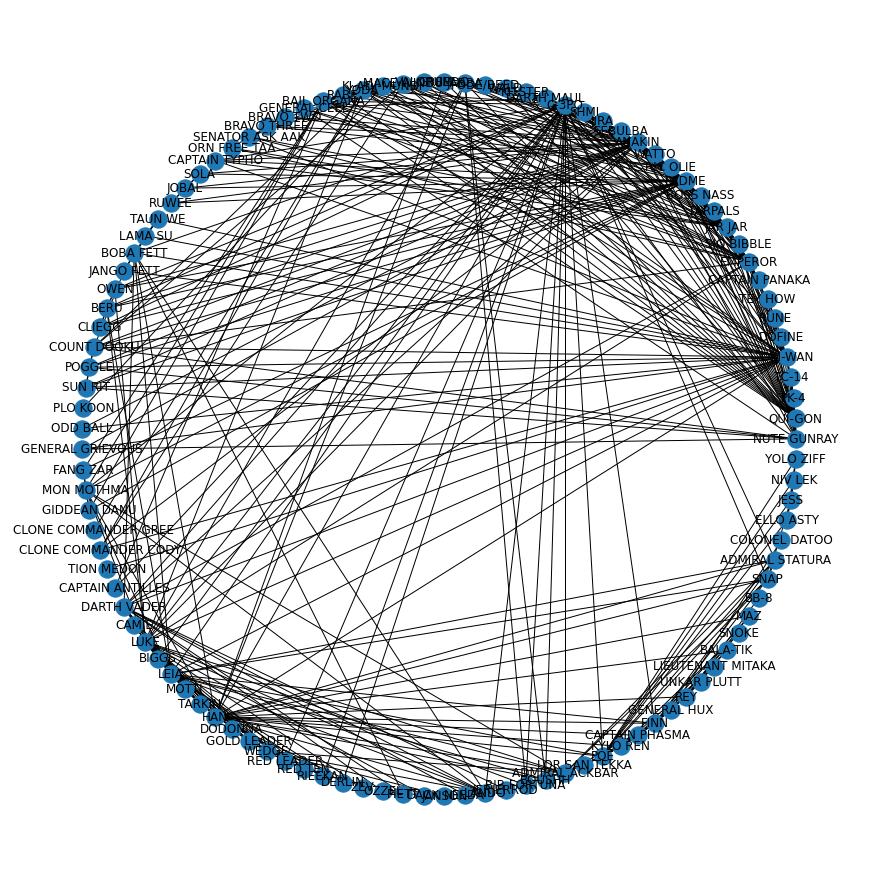

In [160]:
plt.figure(figsize=(12,12))
nx.draw_circular(G,with_labels=True)

In [161]:
EN = {n: i for i,n in enumerate(G.nodes())}
nG = ig.Graph.from_networkx(G)

In [240]:
N = nodes.shape[0]
i = np.random.randint(N)
j = np.random.randint(N)

print(f'Shortest path from {nodes.iloc[i,0]} to {nodes.iloc[j,0]} is')
[[nodes.iloc[x,0] for x in xs] for xs in nG.shortest_paths(i,j)]

Shortest path from DARTH MAUL to NUTE GUNRAY is


[['PK-4']]

In [143]:
def getNames(xs):
    return [nodes['name'][i] for i in xs]

In [144]:
[getNames(i) for i in sorted(nG.maximal_cliques(), key=lambda x: len(x), reverse=True)[:20]]

[['ANAKIN',
  'NUTE GUNRAY',
  'BAIL ORGANA',
  'YODA',
  'MACE WINDU',
  'PADME',
  'JAR JAR',
  'CAPTAIN PANAKA',
  'OBI-WAN'],
 ['LEIA',
  'C-3PO',
  'HAN',
  'BOUSHH',
  'SNAP',
  'BB-8',
  'CAPTAIN PHASMA',
  'LOR SAN TEKKA'],
 ['KI-ADI-MUNDI',
  'NUTE GUNRAY',
  'BAIL ORGANA',
  'YODA',
  'MACE WINDU',
  'ANAKIN',
  'CAPTAIN PANAKA',
  'OBI-WAN'],
 ['C-3PO',
  'BAIL ORGANA',
  'PADME',
  'YODA',
  'ANAKIN',
  'CAPTAIN PANAKA',
  'OBI-WAN',
  'NUTE GUNRAY'],
 ['SIO BIBBLE',
  'NUTE GUNRAY',
  'ANAKIN',
  'PADME',
  'JAR JAR',
  'CAPTAIN PANAKA',
  'EMPEROR',
  'OBI-WAN'],
 ['SHMI', 'NUTE GUNRAY', 'ANAKIN', 'PADME', 'JAR JAR', 'JABBA', 'SEBULBA'],
 ['SUN RIT', 'QUI-GON', 'POGGLE', 'COUNT DOOKU', 'ANAKIN', 'PADME', 'OBI-WAN'],
 ['BOSS NASS',
  'NUTE GUNRAY',
  'ANAKIN',
  'PADME',
  'JAR JAR',
  'EMPEROR',
  'OBI-WAN'],
 ['CAPTAIN TYPHO',
  'OBI-WAN',
  'BAIL ORGANA',
  'YODA',
  'MACE WINDU',
  'JAR JAR',
  'CAPTAIN PANAKA'],
 ['CAMIE', 'C-3PO', 'HAN', 'LEIA', 'BOUSHH', 'NEEDA', 'M

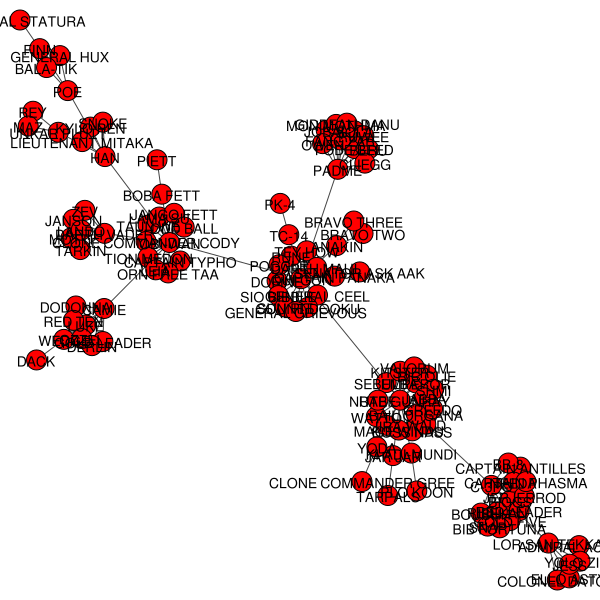

<Figure size 1080x1080 with 0 Axes>

In [129]:
sTree = nG.spanning_tree()
sTree.vs['label'] = nodes['name']
plt.figure(figsize=(15,15))
ig.plot(sTree)

In [130]:
sorted(list(zip(nodes['name'],nG.pagerank())),key=lambda x: x[1], reverse=True)

[('ANAKIN', 0.043218797265693984),
 ('OBI-WAN', 0.038675008148649055),
 ('C-3PO', 0.03567441308134151),
 ('PADME', 0.0339963051654328),
 ('CAMIE', 0.028823079634539613),
 ('HAN', 0.027633094209697326),
 ('NUTE GUNRAY', 0.026684908364773594),
 ('JAR JAR', 0.02566963701540576),
 ('LEIA', 0.024505137615623934),
 ('CAPTAIN PANAKA', 0.023224701168828465),
 ('DARTH VADER', 0.01990426802881511),
 ('QUI-GON', 0.018506506250479844),
 ('LOR SAN TEKKA', 0.018168111129665352),
 ('YODA', 0.01746974055739304),
 ('BAIL ORGANA', 0.017099122545506225),
 ('CAPTAIN PHASMA', 0.015581386126839111),
 ('POE', 0.014621959184925747),
 ('MACE WINDU', 0.013609661497984085),
 ('JABBA', 0.01326012401906735),
 ('BOUSHH', 0.012819843228138004),
 ('UNKAR PLUTT', 0.012701264713336661),
 ('WEDGE', 0.011509585213464776),
 ('BOBA FETT', 0.011360937336450803),
 ('MON MOTHMA', 0.0113406035887559),
 ('COUNT DOOKU', 0.010961032047403117),
 ('KI-ADI-MUNDI', 0.01075704762516287),
 ('NEEDA', 0.010707303175083196),
 ('FINN', 0.0

# Corporate Ownerships

Data comes from [here](http://vlado.fmf.uni-lj.si/pub/networks/data/econ/Eva/Eva.htm)

In [243]:
with open('data/nodes.csv',encoding='latin-1') as f:
    raw = f.readlines()
    
nodes = [x.strip().split() for x in raw]
nodes = {int(x[0]): ' '.join(x[1:]).replace("\"",'') for x in nodes}
nodes

{1: 'Advance Publications',
 2: 'A.H. Belo',
 3: 'America Online (AOL)',
 4: 'AT&T',
 5: 'Bertelsmann',
 6: 'Cablevision',
 7: 'CNHI',
 8: 'Comcast',
 9: 'Cox Enterprises',
 10: 'Disney',
 11: 'Dow-Jones &',
 12: 'E.W. Scripps',
 13: 'Gannett',
 14: 'General Electric (GE)',
 15: 'Hearst',
 16: 'Hollinger',
 17: 'Knight Ridder',
 18: 'Liberty Group Publishing',
 19: 'The McGraw-Hill Companies',
 20: 'Media General',
 21: 'Meredith',
 22: 'McClatchy',
 23: 'News',
 24: 'New York Times',
 25: 'Reed Elsevier',
 26: 'Seagram',
 27: 'Sinclair Broadcast Group (SBG)',
 28: 'Sony',
 29: 'Times Mirror',
 30: 'Time Warner',
 31: 'Tribune',
 32: 'USA Networks',
 33: 'Viacom',
 34: 'Vulcan',
 35: 'Washington Post',
 36: 'Yahoo!',
 37: 'The Birmingham News (Alabama)',
 38: 'Harrisburg Patriot-News (Pennsylvania)',
 39: 'The Huntsville Times (Alabama)',
 40: 'The Jersey Journal (Jersey City, NJ)',
 41: 'Mississippi Press (Pascagoula)',
 42: 'The Oregonian (Portland)',
 43: 'Plain Dealer (Cleveland)',

In [244]:
with open('data/edges.csv') as f:
    raw = f.readlines()
    
edges = [x.strip().split() for x in raw]
edges = [(int(x[0]), int(x[1])) for x in edges]
edges

[(1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (46, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (53, 54),
 (53, 55),
 (53, 56),
 (53, 57),
 (53, 58),
 (53, 59),
 (53, 60),
 (53, 61),
 (53, 62),
 (1, 63),
 (1, 64),
 (64, 65),
 (64, 66),
 (64, 67),
 (64, 68),
 (64, 69),
 (64, 70),
 (64, 71),
 (64, 73),
 (64, 74),
 (64, 75),
 (64, 76),
 (64, 77),
 (64, 78),
 (64, 79),
 (64, 80),
 (64, 81),
 (64, 82),
 (64, 83),
 (64, 84),
 (64, 85),
 (85, 86),
 (64, 3864),
 (64, 87),
 (1, 88),
 (88, 89),
 (88, 90),
 (88, 72),
 (88, 91),
 (88, 3870),
 (88, 92),
 (88, 93),
 (88, 94),
 (88, 95),
 (88, 96),
 (88, 97),
 (88, 98),
 (88, 99),
 (88, 100),
 (1, 177),
 (1, 102),
 (1, 103),
 (1, 104),
 (1, 3850),
 (3850, 3851),
 (3850, 3852),
 (3850, 3853),
 (3850, 3854),
 (3850, 3855),
 (3850, 3856),
 (3850, 3857),
 (3850, 3858),
 (3850, 3859),
 (1, 3860),
 (3860, 3849),
 (3860, 103),
 (3860, 3862),
 (3860, 3863),
 (1, 3865),
 (1, 3867),
 (

In [245]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(edges)

/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


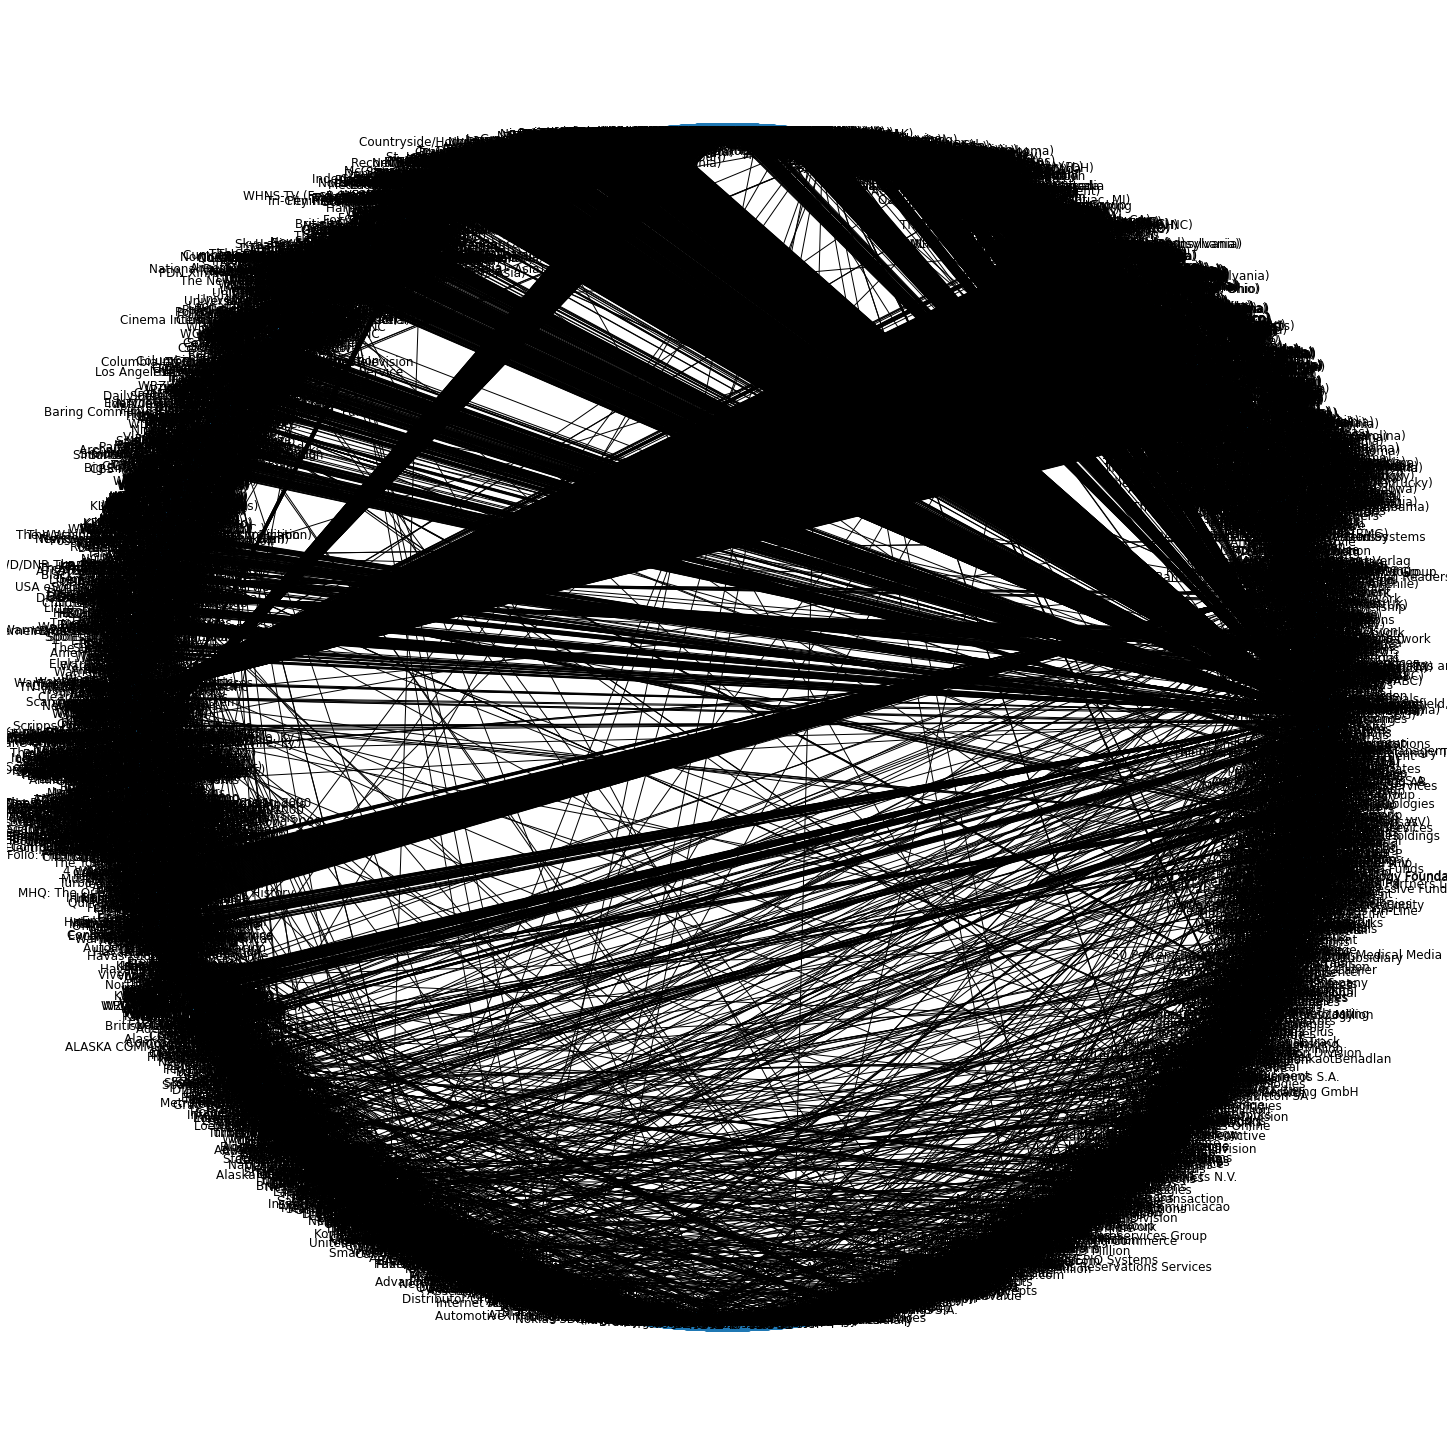

In [151]:
plt.figure(figsize=(20,20))
nx.draw_circular(G,labels=nodes)

In [246]:
nG = ig.Graph.from_networkx(G)

In [247]:
cliques = sorted(nG.maximal_cliques(),key=lambda x: len(x),reverse=True)[:10]
cliques

[(3435, 31, 3836, 3434),
 (8139, 4752, 4766),
 (4842, 32, 3568),
 (27, 3233, 3235),
 (2, 29, 3775),
 (5107, 4752, 5044),
 (29, 165, 7),
 (29, 165, 171),
 (29, 165, 3775),
 (3834, 31, 3436)]

In [154]:
def getCorporateName(x):
    try:
        return nodes[x]
    except:
        return 'ERROR'

In [248]:
[[getCorporateName(i) for i in xs] for xs in cliques]

[['WPMT TV - Harrisburg',
  'Tribune',
  'Yahoo! Shopping',
  'WGNO TV - New Orleans'],
 ['ERROR', 'Le Quotidien du Medecin', 'Nathan'],
 ['Stamps.com', 'USA Networks', '?'],
 ['Sinclair Broadcast Group (SBG)', 'ERROR', 'ERROR'],
 ['A.H. Belo', 'Times Mirror', 'KRPM-AM (Seattle)'],
 ['MCMS', 'Le Quotidien du Medecin', 'NTL'],
 ['Times Mirror', 'AT&T Digital Cable', 'CNHI'],
 ['Times Mirror', 'AT&T Digital Cable', 'BET Holdings II'],
 ['Times Mirror', 'AT&T Digital Cable', 'KRPM-AM (Seattle)'],
 ['Yahoo! Autos', 'Tribune', 'WNOL TV - New Orleans']]

In [199]:
pagerank = sorted(zip(G.nodes, nG.pagerank()), key=lambda x: x[1], reverse=True)
for x in pagerank:
    print(np.round(x[1],4), nodes[x[0]])

0.0341 Clear Channel Communications
0.0179 Liberty Group Publishing
0.013 CNHI
0.0104 News
0.0091 CBS RADIO - Infinity Broadcasting
0.0091 Lee Enterprises
0.0083 Gannett
0.0079 Disney
0.0077 PRIMEDIA
0.0065 Time Warner
0.0057 Media General
0.0055 Hearst
0.0054 Viacom
0.0048 Kagan World Media
0.0044 Sony
0.0042 Liberty Media
0.004 Bertelsmann
0.004 MediaNews Group
0.0036 Knight Ridder
0.0036 Tribune
0.0034 The McGraw-Hill Companies
0.0033 Cox Radio
0.0031 Warner Music Group
0.0027 Emmis Communications
0.0026 Sinclair Broadcast Group (SBG)
0.0026 New York Times
0.0025 Landmark Communications (LCNI)
0.0025 Simba
0.0025 Meredith
0.0024 Reed Elsevier
0.0024 AT&T
0.0023 Vivendi Universal
0.0023 E.W. Scripps
0.0021 Belo
0.002 Dow-Jones &
0.0019 General Electric (GE)
0.0019 McClatchy
0.0019 Washington Post
0.0018 Vulcan
0.0018 Media Central
0.0018 Advance Publications
0.0016 Cablevision
0.0016 PSINet
0.0016 Fox Television Stations
0.0016 Cisco Systems
0.0015 Intel
0.0015 Comcast
0.0015 USA Net

KeyError: 4945

In [249]:
nodes[np.argmax(nG.degree())]

'1 43'

In [ ]:
sTree = nG.spanning_tree()
sTree.vs['label'] = nodes.values()
plt.figure(figsize=(15,15))
ig.plot(sTree)